In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import matplotlib as mpl
import graph_tool.all as gt
import numpy as np

# make sure the text is not rendered as paths, but as editable text
mpl.rcParams['svg.fonttype'] = 'none'

#### Self-attention diagram (single row without embedding representation)

In [46]:
sns.color_palette('tab20')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.6823529411764706, 0.7803921568627451, 0.9098039215686274),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (1.0, 0.7333333333333333, 0.47058823529411764),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.596078431372549, 0.8745098039215686, 0.5411764705882353),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (1.0, 0.596078431372549, 0.5882352941176471),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.7725490196078432, 0.6901960784313725, 0.8352941176470589),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7686274509803922, 0.611764705882353, 0.5803921568627451),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.9686274509803922, 0.7137254901960784, 0.8235294117647058),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7803921568627451, 0.7803921568627451, 0.7803921568627451),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.8588235294117647, 0.8588235294117647, 0.5529411764705883),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.6196078431372549, 0.8549019607843137, 0.8980392156862745)]

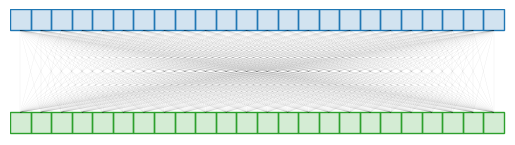

In [51]:
# 定义序列的长度
N = 24

# 创建新的figure和axes
fig, ax = plt.subplots()

# 设置图形的宽高比
ax.set_aspect('equal')

# 获取seaborn的调色板
palette = sns.color_palette()

# 画出两个序列的正方形
for i in range(N):
    # 创建一个正方形，位置在(i, 0)和(i, 3)，大小为1x1
    rect1 = patches.Rectangle((i, 0), 1, 1, edgecolor=palette[2], facecolor=list(palette[2]) + [0.2])
    rect2 = patches.Rectangle((i, 5), 1, 1, edgecolor=palette[0], facecolor=list(palette[0]) + [0.2])

    # 将正方形添加到图形中
    ax.add_patch(rect1)
    ax.add_patch(rect2)

# 画出连接两个序列的线
for i in range(N):
    for j in range(N):
        # 创建一条线，从序列A的第i个元素的上边到序列B的第j个元素的下边
        ax.plot([i+0.5, j+0.5], [1, 5], color='black', linewidth=0.05, alpha=0.4)

# 设置坐标轴的范围
ax.set_xlim(0, N+0.1)
ax.set_ylim(-0.1, 6)

# 隐藏坐标轴
ax.axis('off')

# 显示图形
plt.show()

# 保存图形为svg
fig.savefig("figs/self_attention.svg", format='svg')

#### Self-attention diagram (multiple rows with embedding representation)

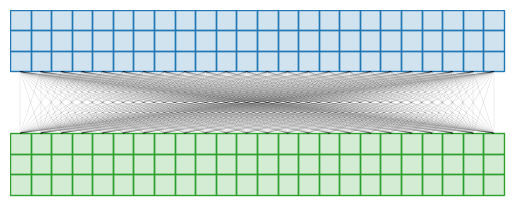

In [81]:
# 定义序列的长度
N = 24

# 创建新的figure和axes
fig, ax = plt.subplots()

# 设置图形的宽高比
ax.set_aspect('equal')

# 获取seaborn的调色板
palette = sns.color_palette()

# 画出两个序列的正方形，现在每个序列有三行
for i in range(N):
    # 对于rect1，创建三个正方形，位置分别在(i, 0)，(i, 1)，和(i, 2)
    for y_offset in [0, 1, 2]:
        rect1 = patches.Rectangle((i, y_offset), 1, 1, edgecolor=palette[2], facecolor=list(palette[2]) + [0.2])
        ax.add_patch(rect1)
    
    # 对于rect2，创建三个正方形，位置分别在(i, 3)，(i, 4)，和(i, 5)
    for y_offset in [6, 7, 8]:
        rect2 = patches.Rectangle((i, y_offset), 1, 1, edgecolor=palette[0], facecolor=list(palette[0]) + [0.2])
        ax.add_patch(rect2)

# 由于现在rect2的行数增加了，需要调整连接线的代码和坐标轴的范围
for i in range(N):
    for j in range(N):
        # 连接第一行和第四行
        ax.plot([i+0.5, j+0.5], [3, 6], color="black", linewidth=0.1, alpha=0.5)

# 调整坐标轴的范围以适应新增的行
ax.set_xlim(0, N+0.1)
ax.set_ylim(-0.1, 9)  # 更新y轴的范围以包含新增的行

# 其余代码保持不变

# 隐藏坐标轴
ax.axis('off')

# 显示图形
plt.show()

# 保存图形为svg
fig.savefig("figs/self-attention.svg", format='svg')

#### Motif attention diagram (single row without embedding representation)

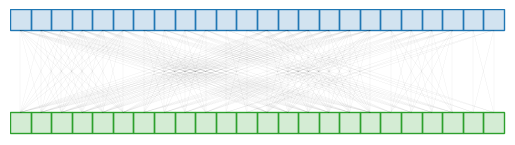

In [58]:
# 定义序列的长度
N = 24

# 创建新的figure和axes
fig, ax = plt.subplots()

# 设置图形的宽高比
ax.set_aspect('equal')

# 获取seaborn的调色板
palette = sns.color_palette()

# 画出两个序列的正方形
for i in range(N):
    # 创建一个正方形，位置在(i, 0)和(i, 3)，大小为1x1
    rect1 = patches.Rectangle((i, 0), 1, 1, edgecolor=palette[2], facecolor=list(palette[2]) + [0.2])
    rect2 = patches.Rectangle((i, 5), 1, 1, edgecolor=palette[0], facecolor=list(palette[0]) + [0.2])

    # 将正方形添加到图形中
    ax.add_patch(rect1)
    ax.add_patch(rect2)

# 定义正方形的类别
classes = {
    (0, 1, 2, 3, 4, 5): (0, 1, 2, 3, 4, 5, 12, 13, 14, 15, 16, 17),
    (6,7,8,9): (6,7,8,9, 18,19,20,21),
    (10,11): (10,11,22, 23),
    (12, 13, 14, 15, 16, 17) : (0, 1, 2, 3, 4, 5, 12, 13, 14, 15, 16, 17),
    (18,19,20,21) : (6,7,8,9, 18,19,20,21),
    (22, 23) : (10,11,22, 23),
}


# 画出连接两个序列的线
for i in range(N):
    for j in range(N):
        # 检查两个正方形是否属于同一类
        for a_indices, b_indices in classes.items():
            if i in a_indices and j in b_indices:
                # 创建一条线，从序列A的第i个元素的上边到序列B的第j个元素的下边
                ax.plot([i+0.5, j+0.5], [1, 5], color="black", linewidth=0.05,alpha=0.4)

# 设置坐标轴的范围
ax.set_xlim(0, N+0.1)
ax.set_ylim(-0.1, 6)

# 隐藏坐标轴
ax.axis('off')

# 显示图形
plt.show()

# 保存图形为svg
fig.savefig("figs/motif_attention.svg", format='svg')

### Trajectory plot as directed graph

In [2]:
g = gt.Graph(
    [
        (0, 1), (1, 2), (2,0), (0, 3), (3,0),(0,4),(4,5),(5,6),(6,4),(4,7),(7,4),(4,0),
        (7, 8),(8, 7),(7, 9),(9, 10),(10, 11),(11,9),(9,12),(12,13),(13,14),(14,13),(13,15),(15,16),(16,13)
    ]
        )

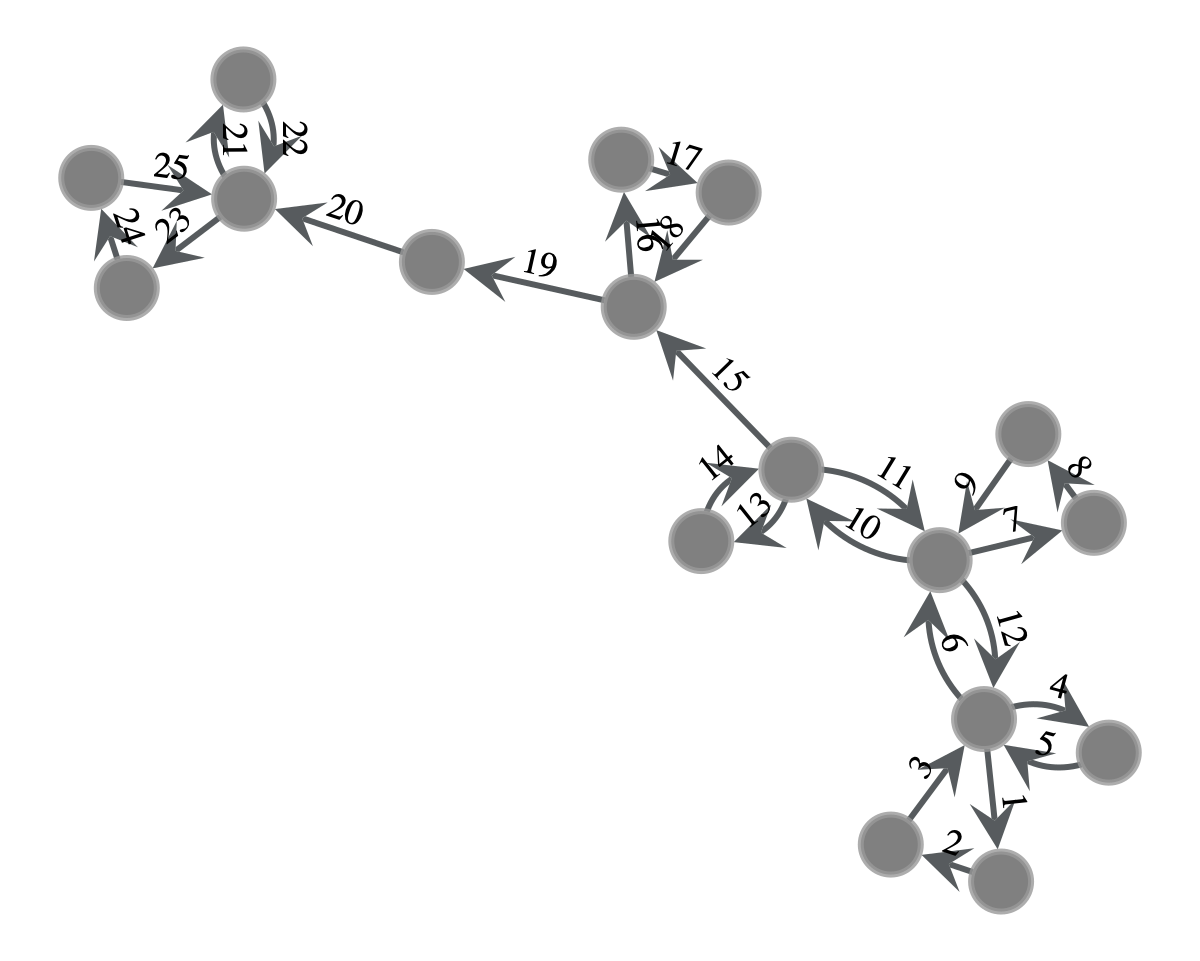

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x17edb8c20, at 0x17edbb0b0>

In [9]:
elabels = g.new_edge_property("int")
elabels.a = np.arange(len(np.array(g.edge_index))) + 1
pos = gt.sfdp_layout(g)
gt.graph_draw(g, pos=pos, edge_text=elabels, vertex_fill_color='grey', vertex_size=30, output="figs/ori_traj.svg")
gt.graph_draw(g, pos=pos, edge_text=elabels, vertex_fill_color='grey', vertex_size=30)

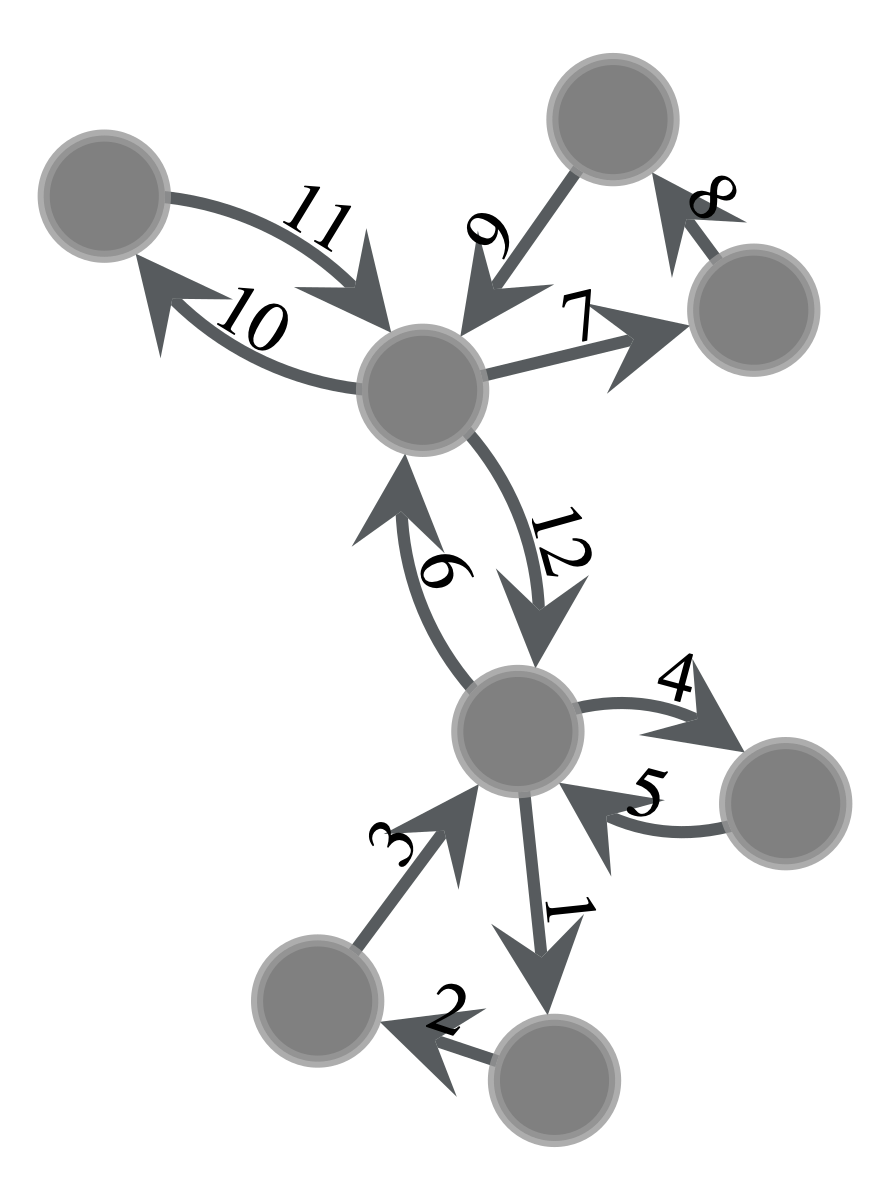

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x303bdf170, at 0x17edbb140>

In [10]:
subgraph = gt.Graph([(0, 1), (1, 2), (2,0), (0, 3), (3,0),(0,4),(4,5),(5,6),(6,4),(4,7),(7,4),(4,0)])
elabels = subgraph.new_edge_property("int")
elabels.a = np.arange(len(np.array(subgraph.edge_index))) + 1
gt.graph_draw(subgraph, pos=pos, edge_text=elabels, vertex_fill_color='grey', output="figs/sub_traj.svg")
gt.graph_draw(subgraph, pos=pos, edge_text=elabels, vertex_fill_color='grey')

### Attention or tenor matrix (scratch version)

/var/folders/3z/wdtcvnz52_1ffx0skvy0cyqm0000gn/T/ipykernel_2053/1312724517.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10')


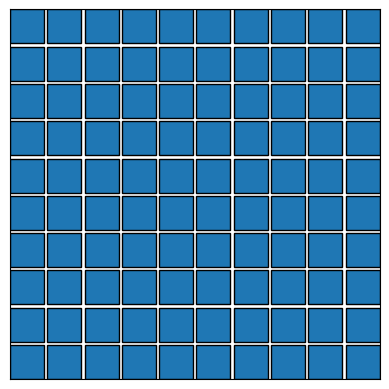

In [68]:
# Define the size of the square and the number of smaller squares
square_size = 10
num_squares = 10
gap_width = 1  # 设置空白的宽度

colormap = plt.cm.get_cmap('tab10')
first_color = colormap.colors[0]
# Create a figure and axis
fig, ax = plt.subplots()

# Loop through each row and column to draw the smaller squares
for i in range(num_squares):
    for j in range(num_squares):
        # Calculate the coordinates of the current smaller square
        x = i * (square_size + gap_width)  # 添加偏移量
        y = j * (square_size + gap_width)  # 添加偏移量
        
        # Draw the smaller square with black edges
        ax.add_patch(plt.Rectangle((x, y), square_size, square_size, facecolor=first_color, edgecolor='black'))

# Set the aspect ratio to equal to make each patch a square
ax.set_aspect('equal')

# Set the limits of the plot
ax.set_xlim(0, square_size * num_squares + gap_width * (num_squares - 1))  # 调整x轴的范围
ax.set_ylim(0, square_size * num_squares + gap_width * (num_squares - 1))  # 调整y轴的范围

# Remove the axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()
fig.savefig('figs/test.svg')


/var/folders/3z/wdtcvnz52_1ffx0skvy0cyqm0000gn/T/ipykernel_2053/190865944.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10')


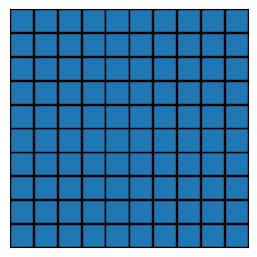

In [77]:
import matplotlib.pyplot as plt

# Define the size of the square and the number of smaller squares
square_size = 30
num_squares = 10  # Adjusted number of squares
gap_width = 1  # Gap width

# Calculate the total figure size needed to accommodate all squares and gaps
total_size = num_squares * square_size + (num_squares - 1) * gap_width
fig_size = total_size / plt.rcParams['figure.dpi']  # Convert size in pixels to inches

# Create a figure with the dynamically adjusted size
fig, ax = plt.subplots(figsize=(fig_size, fig_size))

colormap = plt.cm.get_cmap('tab10')
first_color = colormap.colors[0]

# Loop through each row and column to draw the smaller squares
for i in range(num_squares):
    for j in range(num_squares):
        x = i * (square_size + gap_width)
        y = j * (square_size + gap_width)
        ax.add_patch(plt.Rectangle((x, y), square_size, square_size, facecolor=first_color, edgecolor='black'))

# Set the aspect ratio to equal and adjust plot limits
ax.set_aspect('equal')
ax.set_xlim(0, total_size)
ax.set_ylim(0, total_size)

# Remove the axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()
fig.savefig('figs/test.svg')

/var/folders/3z/wdtcvnz52_1ffx0skvy0cyqm0000gn/T/ipykernel_2053/3560128229.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = plt.cm.get_cmap('tab10')


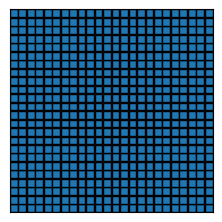

In [80]:
# Define the size of the square, the number of smaller squares, and the gap width
square_size = 10
num_squares = 24  # This can be adjusted
gap_width = 1  # Adjusted gap width

# Calculate the total size needed to accommodate all squares and gaps
total_size = num_squares * square_size + (num_squares - 1) * gap_width
fig_size = total_size / plt.rcParams['figure.dpi']  # Convert size in pixels to inches

# Create a figure with the dynamically adjusted size
fig, ax = plt.subplots(figsize=(fig_size, fig_size))

colormap = plt.cm.get_cmap('tab10')
first_color = colormap.colors[0]

# Loop through each row and column to draw the smaller squares
for i in range(num_squares):
    for j in range(num_squares):
        x = i * (square_size + gap_width)
        y = j * (square_size + gap_width)
        ax.add_patch(plt.Rectangle((x, y), square_size, square_size, facecolor=first_color, edgecolor='black'))

# Set the aspect ratio to equal and adjust plot limits
ax.set_aspect('equal')
ax.set_xlim(0, total_size)
ax.set_ylim(0, total_size)

# Remove the axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.show()
fig.savefig('figs/test.svg')

### 2D tensor or attention matrix (Function based version)

In [21]:
def plot_colored_grid(data, cmap, bounds=[0, 0.5, 1], grid=True, labels=False, frame=True):
    """Plot 2d matrix with grid with well-defined colors for specific boundary values.

    :param data: 2d matrix
    :param colors: colors
    :param bounds: bounds between which the respective color will be plotted
    :param grid: whether grid should be plotted
    :param labels: whether labels should be plotted
    :param frame: whether frame should be plotted
    """

    # create discrete colormap
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    # enable or disable frame
    plt.figure(frameon=frame)

    # show grid
    if grid:
        plt.grid(axis='both', color='k', linewidth=2) 
        plt.xticks(np.arange(0.5, data.shape[1], 1))  # correct grid sizes
        plt.yticks(np.arange(0.5, data.shape[0], 1))

    # disable labels
    if not labels:
        plt.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False) 
    # plot data matrix
    plt.imshow(data, cmap=cmap, norm=norm)

    # display main axis 
    plt.show()
    plt.savefig('figs/universal_motif_mask.svg')

##### minimal example of a 2D tensor or attention matrix

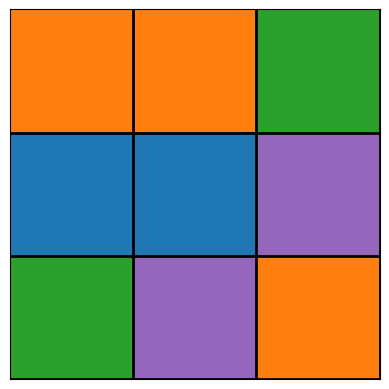

In [8]:
data = np.array([
    [10, 12, 24],
    [5, 2, 33],
    [27, 36, 15]
])


original_cmap = mpl.colormaps['tab10']
# based on the bounds we need 4 colors
selected_colors = [original_cmap(i) for i in [0, 1, 2]]
# 使用选定的颜色创建新的ListedColormap
new_cmap = mpl.colors.ListedColormap(selected_colors)


plot_colored_grid(data, cmap=new_cmap, bounds=[0, 10, 20, 30, 40])

##### Motif-masked attention matrix

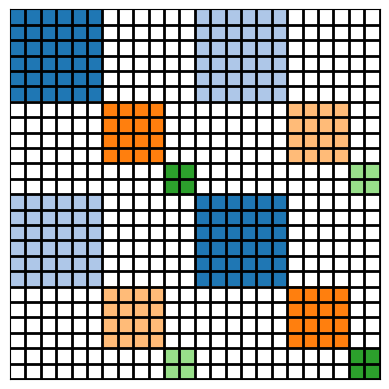

<Figure size 640x480 with 0 Axes>

In [22]:
import numpy as np

# 创建一个24x24的零矩阵
matrix = np.zeros((24, 24))

# 定义子方阵的边界
first_class_bounds = [(0, 6), (12, 18)]
second_class_bounds = [(6, 10), (18, 22)]
third_class_bounds = [(10, 12), (22, 24)]

# attention in the same instance of the same motif type
for start, end in first_class_bounds:
    for i in range(start, end):
        for j in range(start, end):
            matrix[i, j] = 1

# attention between different instances of the same motif type
for i_start, i_end in first_class_bounds:
    for j_start, j_end in first_class_bounds:
        for i in range(i_start, i_end):
            for j in range(j_start, j_end):
                if i not in range(j_start, j_end):
                    matrix[i, j] =2

# 
for start, end in second_class_bounds:
    for i in range(start, end):
        for j in range(start, end):
            matrix[i, j] = 3

for i_start, i_end in second_class_bounds:
    for j_start, j_end in second_class_bounds:
        for i in range(i_start, i_end):
            for j in range(j_start, j_end):
                if i not in range(j_start, j_end):
                    matrix[i, j] = 4

# 填充第三类子方阵
for start, end in third_class_bounds:
    for i in range(start, end):
        for j in range(start, end):
            matrix[i, j] = 5

for i_start, i_end in third_class_bounds:
    for j_start, j_end in third_class_bounds:
        for i in range(i_start, i_end):
            for j in range(j_start, j_end):
                if i not in range(j_start, j_end):
                    matrix[i, j] = 6

original_cmap = mpl.colormaps['tab20']

selected_colors = [(1, 1, 1, 1)] + [original_cmap(i) for i in [0, 1, 2, 3, 4, 5]]

new_cmap = mpl.colors.ListedColormap(selected_colors)

plot_colored_grid(matrix, cmap=new_cmap, bounds=[0, 1, 2, 3, 4, 5, 6, 7])

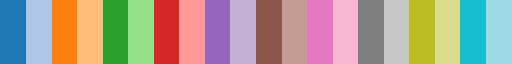

In [20]:
original_cmap